In [1]:
import numpy as np
import torch
from pathlib import Path
import imageio
from typing import Optional
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
datadir = "/work3/frwa/data/phototourism/trevi/"
split = "test"
# read all files in the tsv first (split to train and test later)
tsv = glob.glob(os.path.join(datadir, '*.tsv'))[0]
scene_name = os.path.basename(tsv)[:-4]
files = pd.read_csv(tsv, sep='\t')
files = files[~files['id'].isnull()] # remove data without id
files.reset_index(inplace=True, drop=True)

files = files[files["split"]==split]

imagepaths = sorted((Path(datadir) / "dense" / "images").glob("*.jpg"))
imkey = np.array([os.path.basename(im) for im in imagepaths])
idx = np.in1d(imkey, files["filename"])

imagepaths = np.array(imagepaths)[idx]

/tmp/ipykernel_137449/2947962174.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(im)


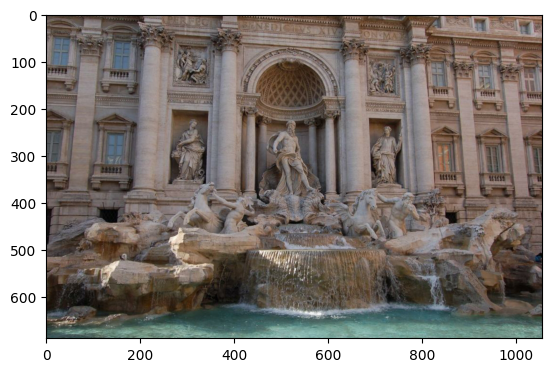

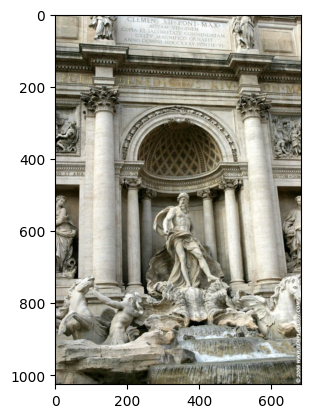

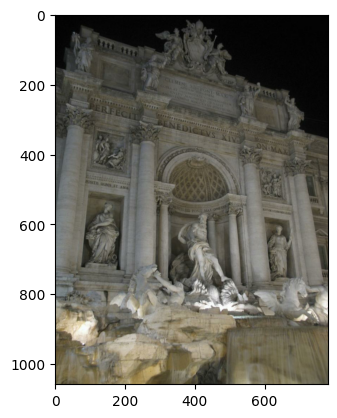

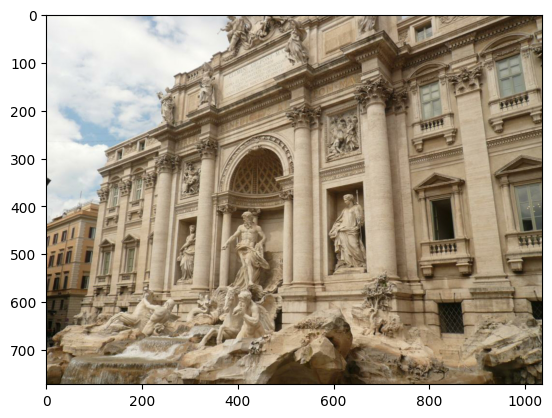

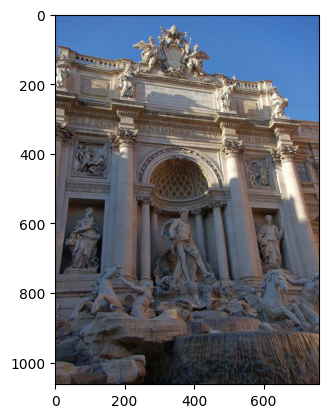

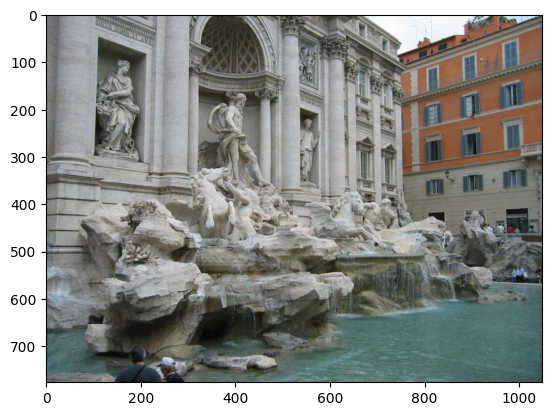

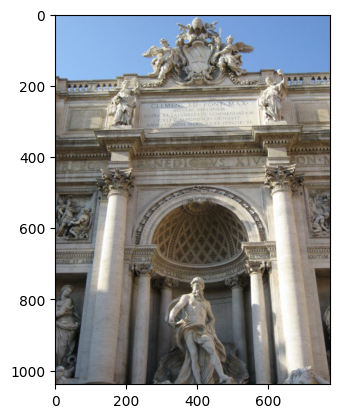

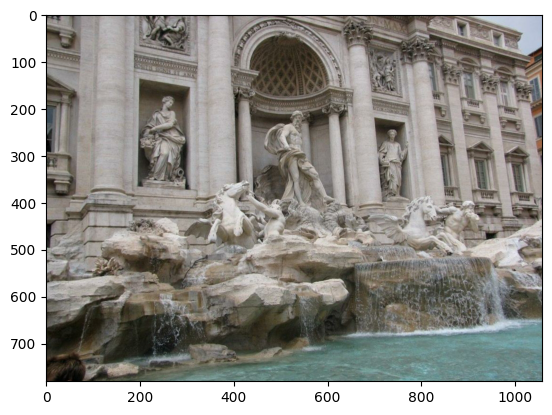

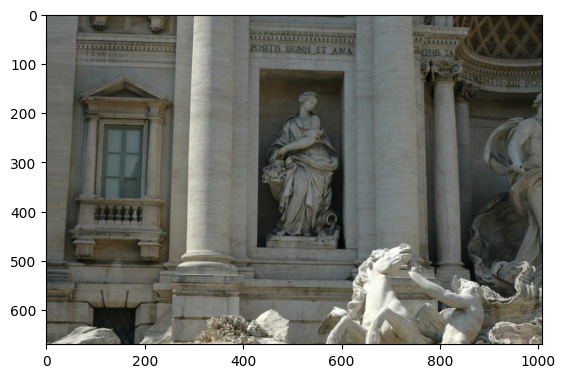

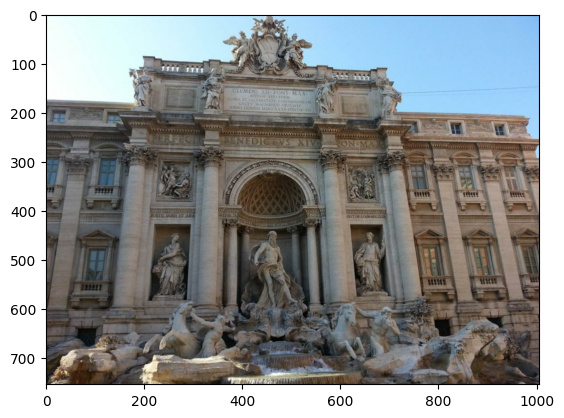

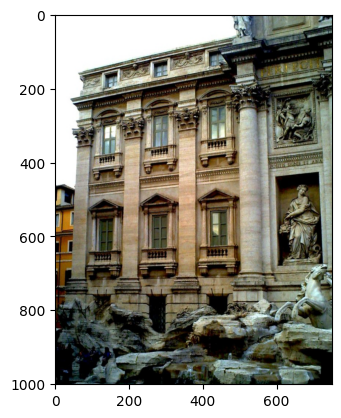

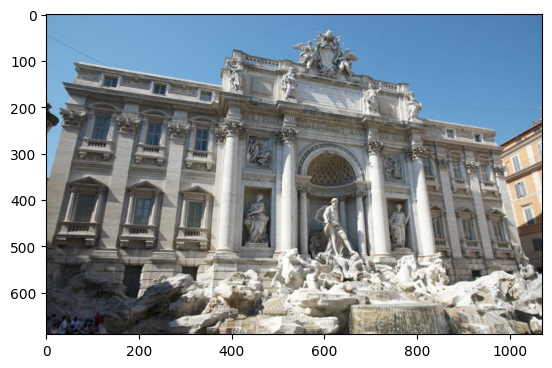

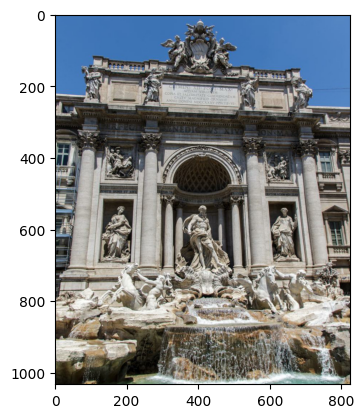

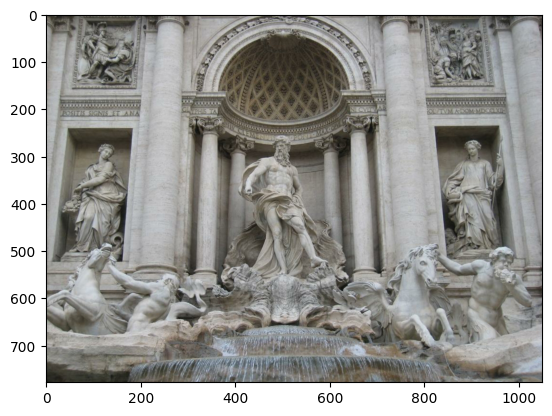

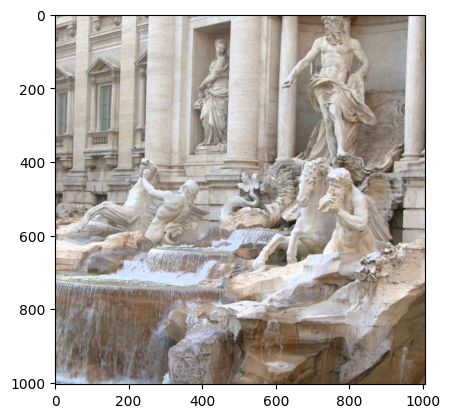

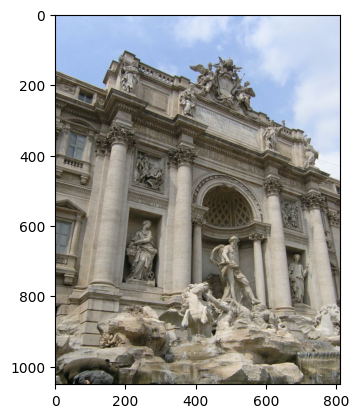

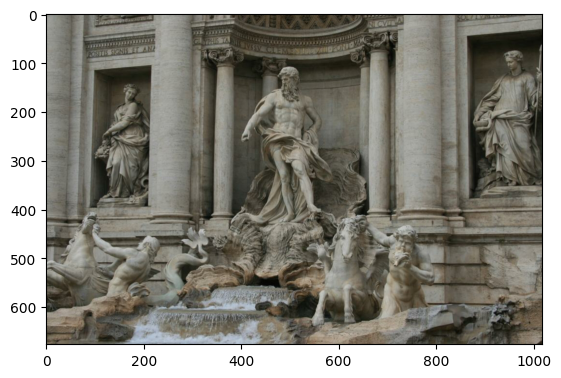

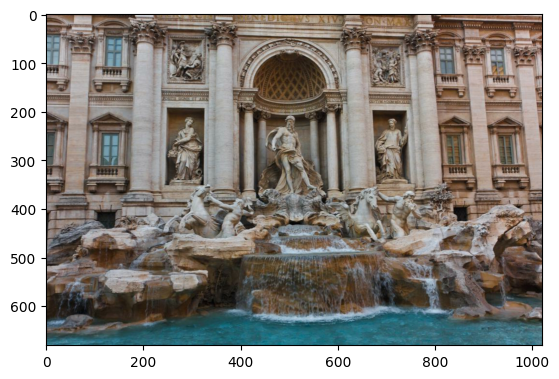

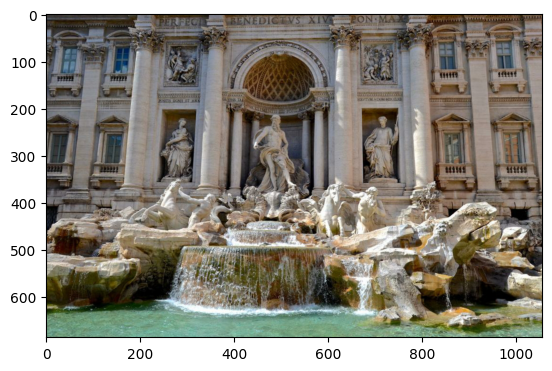

In [3]:
for im in imagepaths:
    image = imageio.imread(im)
    
    plt.imshow(image)
    plt.show()